In [8]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
os.chdir(r'C:\Users\fizzza\Desktop\data mining')
train = pd.read_csv(r'train.csv')

test = pd.read_csv(r'sample_submission.csv')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
X = train.drop(['reordered'],axis=1)
Y = train['reordered']

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 0)


In [6]:
clf = xgb.XGBClassifier(learning_rate=0.1, max_depth=10, min_child_weight=10, n_estimators=250)
clf.fit(X_train, Y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=10, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [9]:
y_predict = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)
y_pred_prob = y_pred_prob[:,1]
print(accuracy_score(Y_test,y_predict))
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,y_predict))
print(classification_report(Y_test,y_predict))
print(metrics.roc_auc_score(Y_test, y_pred_prob))

0.8340555555555556
[[28825  8116]
 [ 6819 46240]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.79     36941
           1       0.85      0.87      0.86     53059

    accuracy                           0.83     90000
   macro avg       0.83      0.83      0.83     90000
weighted avg       0.83      0.83      0.83     90000

0.9189280848550568


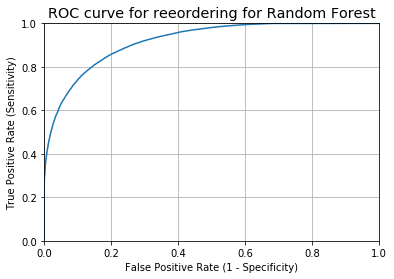

In [10]:

fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for reeordering for Random Forest')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [12]:
import shap

In [13]:
explainerXGB = shap.TreeExplainer(clf)

In [ ]:
shap_values_XGB_test = explainerXGB.shap_values(X_test)

In [ ]:
shap_values_XGB_train = explainerXGB.shap_values(X_train)

In [ ]:
df_shap_XGB_test = pd.DataFrame(shap_values_XGB_test, columns=X_test.columns.values)
df_shap_XGB_train = pd.DataFrame(shap_values_XGB_train, columns=X_train.columns.values)

In [ ]:
j = 0
# initialize js for SHAP
shap.initjs()

In [ ]:
shap.force_plot(explainerXGB.expected_value, shap_values_XGB_test[j], test_data.iloc[[j]])

In [ ]:
shap.summary_plot(shap_values_XGB_train, X_train, plot_type="bar")